In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Admission_Predict_Ver1.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.shape

(500, 9)

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
df = df.drop('Serial No.', axis = 1)

## Architecture

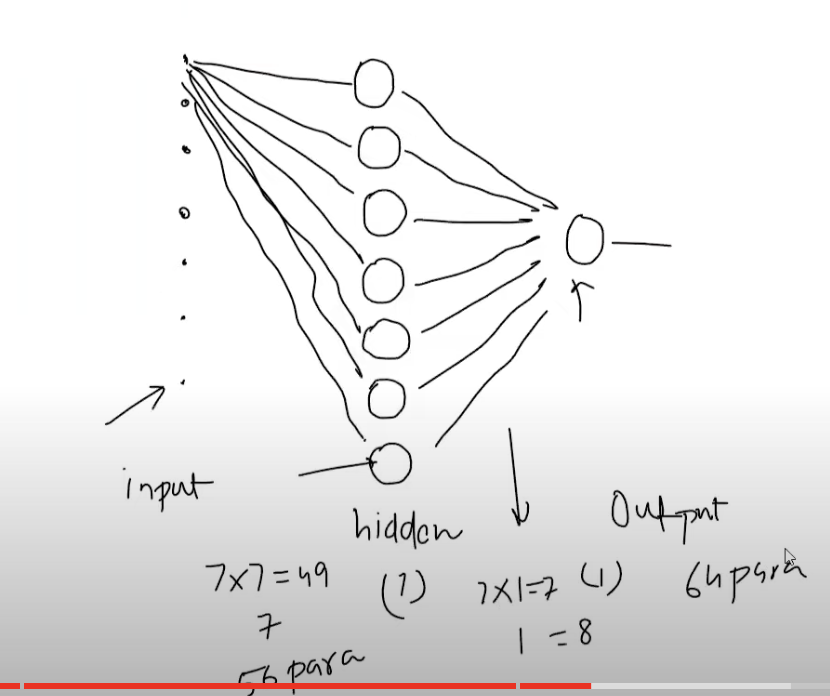

In [12]:
# Dividing Input and output columns
X = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [14]:
# splitting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
# scaling the values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # Because We use it we know the upper and lower bound of the data, like gre maximum can 340

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [17]:
X_train.shape

(400, 7)

In [25]:
model = Sequential()

# First hidden layer so need to mention about the input nodes
model.add(Dense(7,activation='relu',input_dim=7))


# output layer having one perceptron
# linear we are working on regression
model.add(Dense(1,activation='linear'))

In [26]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# need to mention loss function
# Optimizer : Gradient descent algo : Adam
# loss function : mean_squared_loss
model.compile(optimizer='Adam',loss='mean_squared_error')

In [31]:
history = model.fit(X_train_trf,y_train,
                    #
                    batch_size=50,
                    epochs=100,
                    verbose=1,
                    # Splitting the data taken into 80 and 20
                    # evalulating performance with 20 percent
                    validation_split=0.2)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5533 - val_loss: 0.5389
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5203 - val_loss: 0.5148
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5036 - val_loss: 0.4913
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4691 - val_loss: 0.4671
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4360 - val_loss: 0.4413
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4255 - val_loss: 0.4137
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3901 - val_loss: 0.3827
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3613 - val_loss: 0.3488
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3307 - val_loss: 0.3113
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2946 - val_loss: 0.2704
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2469 - val_loss: 0.2287
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2088 - val_loss: 0.1873
E

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0125
Epoch 71/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0096 - val_loss: 0.0124
Epoch 72/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0092 - val_loss: 0.0123
Epoch 73/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093 - val_loss: 0.0122
Epoch 74/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098 - val_loss: 0.0121
Epoch 75/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092 - val_loss: 0.0121
Epoch 76/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0119
Epoch 77/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0086 - val_loss: 0.0119
Epoch 78/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0095 - val_loss: 0.0118
Epoch 79/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0085 - val_loss: 0.0117
Epoch 80/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0090 - val_loss: 0.0116
Epoch 81/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0083 - val_loss: 0.0115
Epoch

In [33]:
y_pred = model.predict(X_test_trf)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step


In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.48425550588771005

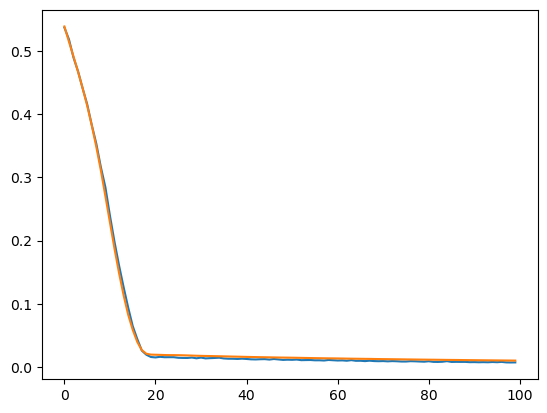

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])